In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from category_encoders import MEstimateEncoder
from pandas.api.types import CategoricalDtype

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from matplotlib import pyplot as plt

In [15]:
data_red = pd.read_csv("winequality-red.csv")
data_white = pd.read_csv("winequality-white.csv")

In [16]:
data_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
data_white

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,4894,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,4895,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,4896,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,4897,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Firstly, I'll solve white wine

In [19]:
data_white.isnull().sum()

Unnamed: 0              0
fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [24]:
data_white.drop("Unnamed: 0", inplace=True, axis=1)
data_white

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [34]:
data_white.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed.acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile.acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric.acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual.sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free.sulfur.dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total.sulfur.dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


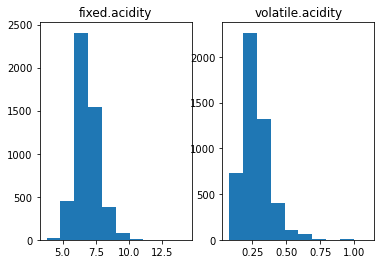

In [57]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(data_white["fixed.acidity"], bins=10)
axs[0].set_title("fixed.acidity")
axs[1].hist(data_white["volatile.acidity"], bins=10)
axs[1].set_title("volatile.acidity")
plt.show()

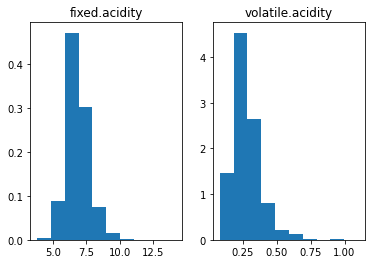

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(data_white["fixed.acidity"], bins=10, density = True)
axs[0].set_title("fixed.acidity")
axs[1].hist(data_white["volatile.acidity"], bins=10, density = True)
axs[1].set_title("volatile.acidity")
plt.show()

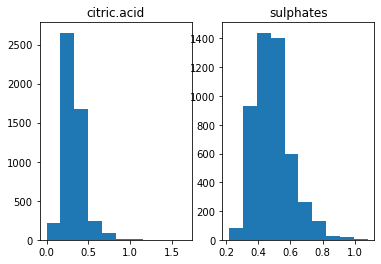

In [52]:
fig, axs = plt.subplots(1, 2)

axs[0].hist(data_white["citric.acid"], bins=10)
axs[0].set_title("citric.acid")
axs[1].hist(data_white["sulphates"], bins=10)
axs[1].set_title("sulphates")

plt.show()

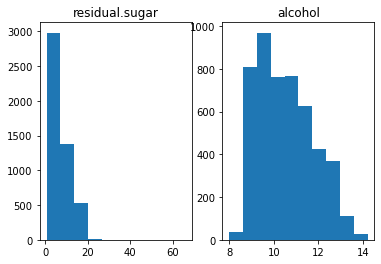

In [55]:
fig, axs = plt.subplots(1, 2)

axs[0].hist(data_white["residual.sugar"], bins=10)
axs[0].set_title("residual.sugar")
axs[1].hist(data_white["alcohol"], bins=10)
axs[1].set_title("alcohol")

plt.show()

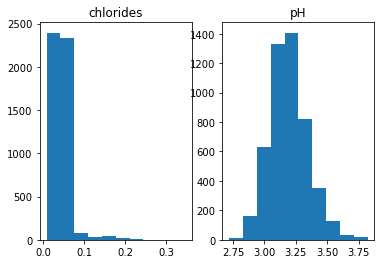

In [56]:
fig, axs = plt.subplots(1, 2)

axs[0].hist(data_white["chlorides"], bins=10)
axs[0].set_title("chlorides")
axs[1].hist(data_white["pH"], bins=10)
axs[1].set_title("pH")

plt.show()

In [62]:
data_white["ph/sulphates"] = data_white.pH / data_white.sulphates
data_white["alcohol/sulphates"] = data_white.alcohol / data_white.sulphates

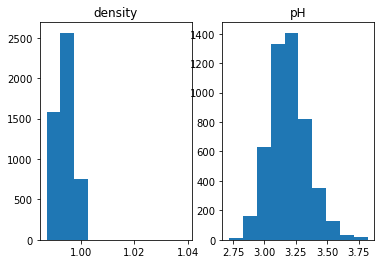

In [61]:
fig, axs = plt.subplots(1, 2)

axs[0].hist(data_white["density"], bins=10)
axs[0].set_title("density")
axs[1].hist(data_white["pH"], bins=10)
axs[1].set_title("pH")

plt.show()

LET'S USE FEATURE ENGINEERIG

In [65]:
X_train, X_test, y_train, y_test = train_test_split(data_white.drop("quality", axis=1), data_white.quality, test_size=0.33, random_state=42)

In [66]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


print(accuracy_score(y_test, y_pred_knn))

0.4557823129251701


In [67]:
accuracy = []
precisions = []
recalls = []
f1s = []

weights = range(5, 100)
for i in weights:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred_knn = knn.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred_knn))
  precisions.append(precision_score(y_test, y_pred_knn, average='micro'))
  recalls.append(recall_score(y_test, y_pred_knn, average='micro'))
  f1s.append(f1_score(y_test, y_pred_knn, average='micro'))

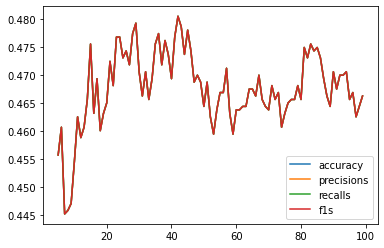

In [68]:


plt.plot(weights, accuracy)
plt.plot(weights, precisions)
plt.plot(weights, recalls)
plt.plot(weights, f1s)
plt.legend(['accuracy', 'precisions', 'recalls', 'f1s'])
plt.show()

let's delete added columns and try again 

In [80]:
data_white2 = pd.read_csv("winequality-white.csv")
data_white2.drop("Unnamed: 0", inplace=True, axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_white2.drop("quality", axis=1), data_white2.quality, test_size=0.33, random_state=42)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print(accuracy_score(y_test, y_pred_knn))

#cross_val_score(LogisticRegression(class_weight={'low':3, 'medium':5, 'high' :8}, max_iter=1000), x_kbest, y_train, scoring='accuracy').mean()

0.49598021026592454


In [74]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print(accuracy_score(y_test, y_pred_log_reg))

0.5318491032776747


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Let's add cros validation

In [82]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(max_iter=10000), X_train, y_train, scoring='accuracy').mean()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.5333750974496045

In [83]:
y_pred_log_reg = log_reg.predict(X_test)
print(accuracy_score(y_test, y_pred_log_reg))

0.5318491032776747


In [84]:
catboost_clf = CatBoostClassifier(iterations=1500, eval_metric='Accuracy')
catboost_clf.fit(X_train, y_train, verbose=True)
y_pred_catboost = catboost_clf.predict(X_test)

Learning rate set to 0.059682
0:	learn: 0.5111247	total: 180ms	remaining: 4m 30s
1:	learn: 0.5236208	total: 189ms	remaining: 2m 21s
2:	learn: 0.5364218	total: 197ms	remaining: 1m 38s
3:	learn: 0.5382505	total: 206ms	remaining: 1m 17s
4:	learn: 0.5361170	total: 214ms	remaining: 1m 4s
5:	learn: 0.5348979	total: 223ms	remaining: 55.6s
6:	learn: 0.5324596	total: 235ms	remaining: 50.2s
7:	learn: 0.5324596	total: 245ms	remaining: 45.8s
8:	learn: 0.5364218	total: 253ms	remaining: 41.9s
9:	learn: 0.5419080	total: 261ms	remaining: 38.9s
10:	learn: 0.5440415	total: 268ms	remaining: 36.3s
11:	learn: 0.5501372	total: 277ms	remaining: 34.3s
12:	learn: 0.5510515	total: 283ms	remaining: 32.4s
13:	learn: 0.5537946	total: 291ms	remaining: 30.9s
14:	learn: 0.5571472	total: 298ms	remaining: 29.5s
15:	learn: 0.5559281	total: 306ms	remaining: 28.4s
16:	learn: 0.5586711	total: 314ms	remaining: 27.4s
17:	learn: 0.5595855	total: 323ms	remaining: 26.6s
18:	learn: 0.5604998	total: 330ms	remaining: 25.7s
19:	lea

In [85]:
cross_val_score(catboost_clf, X_train, y_train, cv=10, scoring='accuracy').mean()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Learning rate set to 0.059361
0:	learn: 0.5118564	total: 8.22ms	remaining: 12.3s
1:	learn: 0.5210027	total: 16.7ms	remaining: 12.5s
2:	learn: 0.5355691	total: 24.2ms	remaining: 12.1s
3:	learn: 0.5348916	total: 36.2ms	remaining: 13.5s
4:	learn: 0.5416667	total: 44.5ms	remaining: 13.3s
5:	learn: 0.5396341	total: 51.9ms	remaining: 12.9s
6:	learn: 0.5369241	total: 60.7ms	remaining: 12.9s
7:	learn: 0.5416667	total: 69.1ms	remaining: 12.9s
8:	learn: 0.5426829	total: 79ms	remaining: 13.1s
9:	learn: 0.5508130	total: 87.1ms	remaining: 13s
10:	learn: 0.5508130	total: 97.9ms	remaining: 13.2s
11:	learn: 0.5511518	total: 105ms	remaining: 13s
12:	learn: 0.5521680	total: 113ms	remaining: 12.9s
13:	learn: 0.5548780	total: 121ms	remaining: 12.8s
14:	learn: 0.5552168	total: 128ms	remaining: 12.7s
15:	learn: 0.5562331	total: 136ms	remaining: 12.6s
16:	learn: 0.5562331	total: 146ms	remaining: 12.7s
17:	learn: 0.5592818	total: 153ms	remaining: 12.6s
18:	learn: 0.5609756	total: 165ms	remaining: 12.8s
19:	le

0.6433825709837645

In [86]:
y_pred_catboost = catboost_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_catboost))

0.6512059369202227


In [88]:

clf_tree = DecisionTreeClassifier(random_state=42, max_features='auto', class_weight='balanced')

clf_tree.fit(X_train, y_train)

cross_val_score(clf_tree, X_train, y_train, cv=10, scoring='accuracy').mean()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.5629253465786938

In [89]:
y_pred_tree = clf_tree.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.5794681508967223


In [90]:

clf_forest = RandomForestClassifier(random_state=42, n_jobs=-1)
clf_forest.fit(X_train, y_train)

cross_val_score(clf_forest, X_train, y_train, cv=10, scoring='accuracy').mean()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.6552755949292017

In [91]:
y_pred_forest = clf_forest.predict(X_test)
print(accuracy_score(y_test, y_pred_forest))

0.660482374768089


Right now Random forest is winner of acuracy scoring 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data_white3 = pd.read_csv("winequality-white.csv")
data_white3.drop(["Unnamed: 0", "residual.sugar"], inplace=True, axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_white3.drop("quality", axis=1), data_white3.quality, test_size=0.33, random_state=42)

I've droppped "residual.sugar", "chlorides" because they haven't canged so much 

In [11]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

In [12]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), GaussianNB(), SVC(), LinearSVC(), CatBoostClassifier()]
accuracy = {}
cross_val = {}

for model in models:
    model.fit(X_train, y_train)
    cross_val[str(model)] = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy').mean()
    y_preds = model.predict(X_test)
    accuracy[str(model)] = accuracy_score(y_test, y_preds)

accuracy

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the dat

Learning rate set to 0.08407
0:	learn: 1.8260263	total: 6.62ms	remaining: 6.61s
1:	learn: 1.7234243	total: 12.7ms	remaining: 6.35s
2:	learn: 1.6410791	total: 18.4ms	remaining: 6.13s
3:	learn: 1.5735860	total: 24.2ms	remaining: 6.03s
4:	learn: 1.5163479	total: 31ms	remaining: 6.18s
5:	learn: 1.4695124	total: 37ms	remaining: 6.13s
6:	learn: 1.4296704	total: 43ms	remaining: 6.1s
7:	learn: 1.3927966	total: 49.1ms	remaining: 6.09s
8:	learn: 1.3599057	total: 55.8ms	remaining: 6.14s
9:	learn: 1.3298214	total: 62.9ms	remaining: 6.22s
10:	learn: 1.3027739	total: 68.5ms	remaining: 6.16s
11:	learn: 1.2809929	total: 74.3ms	remaining: 6.12s
12:	learn: 1.2595578	total: 81.1ms	remaining: 6.15s
13:	learn: 1.2403664	total: 86.6ms	remaining: 6.1s
14:	learn: 1.2217771	total: 93ms	remaining: 6.1s
15:	learn: 1.2054526	total: 99.6ms	remaining: 6.13s
16:	learn: 1.1904321	total: 106ms	remaining: 6.14s
17:	learn: 1.1746036	total: 113ms	remaining: 6.15s
18:	learn: 1.1618096	total: 119ms	remaining: 6.12s
19:	lea

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Learning rate set to 0.083618
0:	learn: 1.8285526	total: 7.93ms	remaining: 7.92s
1:	learn: 1.7332079	total: 14.8ms	remaining: 7.37s
2:	learn: 1.6528048	total: 20.9ms	remaining: 6.96s
3:	learn: 1.5887163	total: 28.3ms	remaining: 7.05s
4:	learn: 1.5299109	total: 34.9ms	remaining: 6.95s
5:	learn: 1.4816568	total: 42.6ms	remaining: 7.06s
6:	learn: 1.4405544	total: 50ms	remaining: 7.1s
7:	learn: 1.4032228	total: 56.6ms	remaining: 7.02s
8:	learn: 1.3700244	total: 64.2ms	remaining: 7.07s
9:	learn: 1.3389445	total: 72.2ms	remaining: 7.15s
10:	learn: 1.3128728	total: 79.8ms	remaining: 7.17s
11:	learn: 1.2914858	total: 86.9ms	remaining: 7.15s
12:	learn: 1.2690873	total: 94.9ms	remaining: 7.2s
13:	learn: 1.2504006	total: 102ms	remaining: 7.16s
14:	learn: 1.2317693	total: 110ms	remaining: 7.19s
15:	learn: 1.2155278	total: 116ms	remaining: 7.14s
16:	learn: 1.2003001	total: 123ms	remaining: 7.14s
17:	learn: 1.1857869	total: 130ms	remaining: 7.11s
18:	learn: 1.1712641	total: 138ms	remaining: 7.11s
19

{'LogisticRegression()': 0.47309833024118736,
 'DecisionTreeClassifier()': 0.5701917130488559,
 'RandomForestClassifier()': 0.6611008039579468,
 'GradientBoostingClassifier()': 0.5652442795299938,
 'KNeighborsClassifier()': 0.46567717996289426,
 'GaussianNB()': 0.44341372912801486,
 'SVC()': 0.4520717377860235,
 'LinearSVC()': 0.07111935683364255,
 '<catboost.core.CatBoostClassifier object at 0x0000029E33EC9910>': 0.660482374768089}

In [9]:
cross_val

{'LogisticRegression()': 0.4736414856549781,
 'DecisionTreeClassifier()': 0.5665894432500556,
 'RandomForestClassifier()': 0.6516253984728297,
 'GradientBoostingClassifier()': 0.5809177848617393,
 'KNeighborsClassifier()': 0.4602046111646526,
 'GaussianNB()': 0.4888779746460079,
 'SVC()': 0.448947290384758,
 'LinearSVC()': 0.31846967899770184,
 '<catboost.core.CatBoostClassifier object at 0x0000029E31DC1730>': 0.6446085699458818}

So the best is random forest classifier, with  dataframe without "residual.sugar" column 

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf_forest = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=1000, criterion="entropy")
clf_forest.fit(X_train, y_train)

cross_val_score(clf_forest, X_train, y_train, cv=10, scoring='accuracy').mean()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.6580176440062273

In [6]:
from sklearn.metrics import accuracy_score
y_pred_forest = clf_forest.predict(X_test)
print(accuracy_score(y_test, y_pred_forest))

0.6753246753246753


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf_forest = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=1000, criterion="entropy", class_weight="balanced_subsample")
clf_forest.fit(X_train, y_train)

cross_val_score(clf_forest, X_train, y_train, cv=10, scoring='accuracy').mean()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.660155497071688

In [12]:
from sklearn.metrics import accuracy_score
y_pred_forest = clf_forest.predict(X_test)
print(accuracy_score(y_test, y_pred_forest))

0.6765615337043909


The best accuracy is 0.676 with RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=1000, criterion="entropy", class_weight="balanced_subsample")

## ALL RIGHT IT'S TIME TO START SOME FEATURE ENGENEERING